In [1]:
! git init
! git pull https://github.com/serzaraisk/noisy_labels.git

Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 119 (delta 46), reused 100 (delta 27), pack-reused 0
Receiving objects: 100% (119/119), 4.36 MiB | 12.66 MiB/s, done.
Resolving deltas: 100% (46/46), done.
From https://github.com/serzaraisk/noisy_labels
 * branch            HEAD       -> FETCH_HEAD


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [75]:
#! rm image_model/image_dataset -rf

In [3]:
 ! mkdir image_model/image_dataset
 ! tar -xvzf drive/MyDrive/HSE_diploma/Image_dataset/image_dataset.tar.gz -C image_model/image_dataset

Выходные данные были обрезаны до нескольких последних строк (5000).
./train/2/7276.jpg
./train/2/8119.jpg
./train/2/9641.jpg
./train/2/8121.jpg
./train/2/7995.jpg
./train/2/7532.jpg
./train/2/7340.jpg
./train/2/10384.jpg
./train/2/9478.jpg
./train/2/9582.jpg
./train/2/9771.jpg
./train/2/8474.jpg
./train/2/7505.jpg
./train/2/9278.jpg
./train/2/8903.jpg
./train/2/9228.jpg
./train/2/8103.jpg
./train/2/8195.jpg
./train/2/7935.jpg
./train/2/7204.jpg
./train/2/7140.jpg
./train/2/9521.jpg
./train/2/8068.jpg
./train/2/9578.jpg
./train/2/7625.jpg
./train/2/7042.jpg
./train/2/9215.jpg
./train/2/10292.jpg
./train/2/10144.jpg
./train/2/9550.jpg
./train/2/8618.jpg
./train/2/8663.jpg
./train/2/10159.jpg
./train/2/8465.jpg
./train/2/9609.jpg
./train/2/8289.jpg
./train/2/9965.jpg
./train/2/10411.jpg
./train/2/9400.jpg
./train/2/8020.jpg
./train/2/8405.jpg
./train/2/7654.jpg
./train/2/8818.jpg
./train/2/9593.jpg
./train/2/7563.jpg
./train/2/9701.jpg
./train/2/9981.jpg
./train/2/9198.jpg
./train/2/7987.

In [4]:
! pip install timm

     |████████████████████████████████| 376 kB 8.6 MB/s 


## Step 0: Imports and Global variable init

In [5]:
from torch import cuda
DEVICE = 'cuda' if cuda.is_available() else 'cpu'
DESTINATION_FOLDER = 'image_model/models'
DATASETS_FOLDER = 'data'
TRAIN_TEST_RATIO = 0.9
TRAIN_VALID_RATIO = 0.8
FRACTION = 0.01
SAMPLE = None
PATH = '//home/images/dev/spochukaev/hse_diploma/image_classification'
BATCH_SIZE = 10
NUM_OF_WORKERS = 0

MODEL_NAME = 'tf_efficientnet_b4_ns'
efficientnet_input_sizes = {'tf_efficientnet_b0_ns':224,
'tf_efficientnet_b1_ns':240,
'tf_efficientnet_b2_ns':260,
'tf_efficientnet_b3_ns':300
#'tf_efficientnet_b4_ns':380,
#'tf_efficientnet_b5_ns':456,
#'tf_efficientnet_b6_ns':528,
#'tf_efficientnet_b7_ns':600
}
print(DEVICE)

cuda


## Step 1: Train_val_test_split data

In [7]:
import prepare_dataset

ModuleNotFoundError: ignored

In [ ]:
df = prepare_dataset.load_dataset(PATH)
df = prepare_dataset.sample_dataset(df, frac=0.5)
df = prepare_dataset.choose_toloka_answer_column(df, 'aggr_answer')
prepare_dataset.train_test_split_df(df, 'lookup_tables/', TRAIN_TEST_RATIO, TRAIN_VALID_RATIO)
df_train, df_val, df_test = prepare_dataset.get_lookup_tables('lookup_tables/')
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)
prepare_dataset.load_pictures(df_train, df_val, df_test)

(10410, 3)
(2604, 3)
(1449, 3)
Кол-во обработанных строк [/train]: 0
http://storage.mds.yandex.net:80/get-mimcache/4362642/d5c170597c0f8126bd54902846374205
Кол-во обработанных строк [/train]: 100
http://storage.mds.yandex.net:80/get-mimcache/44885/0d8b82b7927495a79bac3c633a9b0833
Кол-во обработанных строк [/train]: 400
Кол-во обработанных строк [/train]: 500
Кол-во обработанных строк [/train]: 600
Кол-во обработанных строк [/train]: 700
http://storage.mds.yandex.net:80/get-mimcache/3725176/3b882f65710754d1e9a8e608df1fd5d6
http://storage.mds.yandex.net:80/get-mimcache/44885/8fd2f58e58ca006917d90bf8c4bc2e2d
Кол-во обработанных строк [/train]: 800
Кол-во обработанных строк [/train]: 900
Кол-во обработанных строк [/train]: 1000
http://storage.mds.yandex.net:80/get-mimcache/153320/979453dc6cfb031a62dad02430b79978
http://storage.mds.yandex.net:80/get-mimcache/44885/16dbc8356225364efbb20aabc1f6537f
Кол-во обработанных строк [/train]: 1100
Кол-во обработанных строк [/train]: 1200
Кол-во обрабо

## Step 2: Load Pytorch Dataset

In [7]:
# define my custom dataset for the task
from importlib import reload
import image_model.init_dataset_dataloader as init_dataset_dataloader
reload(init_dataset_dataloader)

<module 'image_model.init_dataset_dataloader' from '/content/image_model/init_dataset_dataloader.py'>

## Step 4: Create ground_truth models

In [8]:
from importlib import reload
import image_model.model as model
reload(model)

<module 'image_model.model' from '/content/image_model/model.py'>

In [107]:
models = {}
BATCH_SIZE = 50

for efficientNet in efficientnet_input_sizes.keys():
    for last_layer in [128, 256]:
        dataset_label = efficientNet + '_' + str(last_layer) + '_ground_truth'
        models[dataset_label] = {}
        models[dataset_label]['model'] = model.create_model(efficientNet, last_layer).to(DEVICE)
        models[dataset_label]['datasets'] =  init_dataset_dataloader.create_datasets('image_model/', efficientnet_input_sizes[efficientNet])
        models[dataset_label]['dataloaders']  = init_dataset_dataloader.create_dataloaders(models[dataset_label]['datasets'][0], 
                                                                                                                     models[dataset_label]['datasets'][1],                                                                                                                     models[dataset_label]['datasets'][2], 
                                                                                                                     BATCH_SIZE, NUM_OF_WORKERS)
print(models.keys())

dict_keys(['tf_efficientnet_b0_ns_128_ground_truth', 'tf_efficientnet_b0_ns_256_ground_truth', 'tf_efficientnet_b1_ns_128_ground_truth', 'tf_efficientnet_b1_ns_256_ground_truth', 'tf_efficientnet_b2_ns_128_ground_truth', 'tf_efficientnet_b2_ns_256_ground_truth', 'tf_efficientnet_b3_ns_128_ground_truth', 'tf_efficientnet_b3_ns_256_ground_truth'])


## Step 5: Training ground_truth models

In [31]:
import shutil
import os
if os.path.isdir(DESTINATION_FOLDER):
    shutil.rmtree(DESTINATION_FOLDER)
os.mkdir(DESTINATION_FOLDER)

In [101]:
import image_model.train_model as train_model

100%|██████████| 52/52 [00:56<00:00,  1.08s/it]


Valid_loss decreased inf --> 0.7637052323955756
save model
Epoch : 1 Train Loss : 0.733661 Train Acc : 0.685161
Epoch : 1 Valid Loss : 0.763705 Valid Acc : 0.683462


100%|██████████| 52/52 [00:56<00:00,  1.08s/it]


Epoch : 2 Train Loss : 0.729142 Train Acc : 0.693008
Epoch : 2 Valid Loss : 0.771134 Valid Acc : 0.681667


100%|██████████| 52/52 [00:56<00:00,  1.08s/it]


Valid_loss decreased 0.7637052323955756 --> 0.7589051138896209
save model
Epoch : 3 Train Loss : 0.733486 Train Acc : 0.692521
Epoch : 3 Valid Loss : 0.758905 Valid Acc : 0.677821
Model saved to ==> image_model/models/tf_efficientnet_b0_ns_128_ground_truth/tf_efficientnet_b0_ns_128_ground_truth_metrics.pt


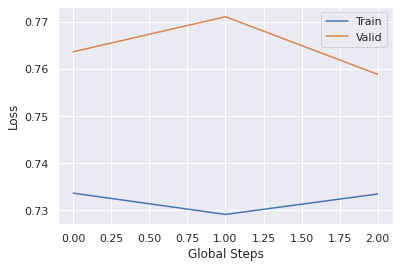

100%|██████████| 52/52 [00:56<00:00,  1.08s/it]


Valid_loss decreased inf --> 0.7732318622561601
save model
Epoch : 1 Train Loss : 0.725991 Train Acc : 0.691424
Epoch : 1 Valid Loss : 0.773232 Valid Acc : 0.687821


100%|██████████| 52/52 [00:56<00:00,  1.08s/it]


Valid_loss decreased 0.7732318622561601 --> 0.755059115588665
save model
Epoch : 2 Train Loss : 0.724319 Train Acc : 0.693691
Epoch : 2 Valid Loss : 0.755059 Valid Acc : 0.688846


100%|██████████| 52/52 [00:56<00:00,  1.09s/it]


Epoch : 3 Train Loss : 0.715145 Train Acc : 0.697161
Epoch : 3 Valid Loss : 0.778322 Valid Acc : 0.673974
Model saved to ==> image_model/models/tf_efficientnet_b0_ns_256_ground_truth/tf_efficientnet_b0_ns_256_ground_truth_metrics.pt


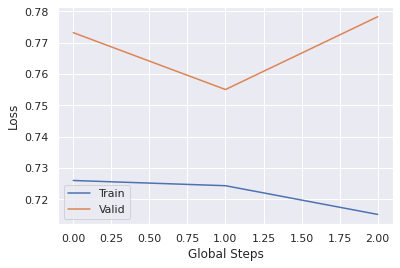

100%|██████████| 52/52 [00:58<00:00,  1.12s/it]


Valid_loss decreased inf --> 0.7482851640536234
save model
Epoch : 1 Train Loss : 0.709809 Train Acc : 0.695076
Epoch : 1 Valid Loss : 0.748285 Valid Acc : 0.677051


100%|██████████| 52/52 [00:58<00:00,  1.12s/it]


Valid_loss decreased 0.7482851640536234 --> 0.7477684829097527
save model
Epoch : 2 Train Loss : 0.704320 Train Acc : 0.699680
Epoch : 2 Valid Loss : 0.747768 Valid Acc : 0.676539


100%|██████████| 52/52 [00:57<00:00,  1.12s/it]


Epoch : 3 Train Loss : 0.698403 Train Acc : 0.706959
Epoch : 3 Valid Loss : 0.753742 Valid Acc : 0.669872
Model saved to ==> image_model/models/tf_efficientnet_b1_ns_128_ground_truth/tf_efficientnet_b1_ns_128_ground_truth_metrics.pt


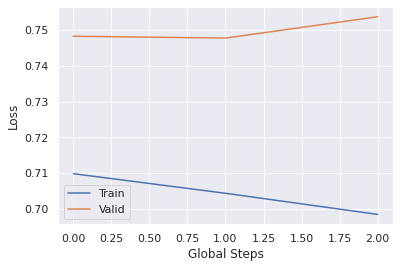

100%|██████████| 52/52 [00:58<00:00,  1.12s/it]


Valid_loss decreased inf --> 0.7478169735807639
save model
Epoch : 1 Train Loss : 0.705777 Train Acc : 0.699819
Epoch : 1 Valid Loss : 0.747817 Valid Acc : 0.679231


100%|██████████| 52/52 [00:58<00:00,  1.13s/it]


Epoch : 2 Train Loss : 0.693399 Train Acc : 0.708302
Epoch : 2 Valid Loss : 0.748711 Valid Acc : 0.677051


100%|██████████| 52/52 [00:58<00:00,  1.12s/it]


Epoch : 3 Train Loss : 0.685071 Train Acc : 0.711424
Epoch : 3 Valid Loss : 0.750502 Valid Acc : 0.670897
Model saved to ==> image_model/models/tf_efficientnet_b1_ns_256_ground_truth/tf_efficientnet_b1_ns_256_ground_truth_metrics.pt


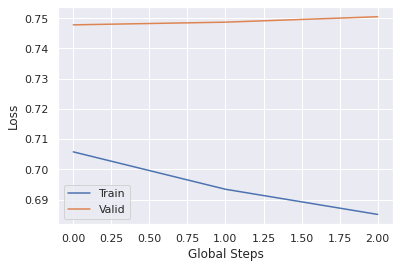

100%|██████████| 52/52 [01:00<00:00,  1.17s/it]


Valid_loss decreased inf --> 0.7872816542020211
save model
Epoch : 1 Train Loss : 0.705153 Train Acc : 0.698356
Epoch : 1 Valid Loss : 0.787282 Valid Acc : 0.661667


100%|██████████| 52/52 [01:00<00:00,  1.17s/it]


Valid_loss decreased 0.7872816542020211 --> 0.7726221336768224
save model
Epoch : 2 Train Loss : 0.708396 Train Acc : 0.700539
Epoch : 2 Valid Loss : 0.772622 Valid Acc : 0.665513


100%|██████████| 52/52 [01:00<00:00,  1.17s/it]


Epoch : 3 Train Loss : 0.693231 Train Acc : 0.705552
Epoch : 3 Valid Loss : 0.784663 Valid Acc : 0.657564
Model saved to ==> image_model/models/tf_efficientnet_b2_ns_128_ground_truth/tf_efficientnet_b2_ns_128_ground_truth_metrics.pt


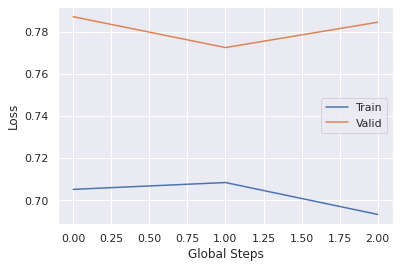

100%|██████████| 52/52 [01:00<00:00,  1.17s/it]


Valid_loss decreased inf --> 0.7848500586473025
save model
Epoch : 1 Train Loss : 0.696238 Train Acc : 0.700734
Epoch : 1 Valid Loss : 0.784850 Valid Acc : 0.649231


100%|██████████| 52/52 [01:00<00:00,  1.17s/it]


Valid_loss decreased 0.7848500586473025 --> 0.7519604580906721
save model
Epoch : 2 Train Loss : 0.699149 Train Acc : 0.710063
Epoch : 2 Valid Loss : 0.751960 Valid Acc : 0.678846


100%|██████████| 52/52 [01:00<00:00,  1.16s/it]


Epoch : 3 Train Loss : 0.688186 Train Acc : 0.706722
Epoch : 3 Valid Loss : 0.773562 Valid Acc : 0.663974
Model saved to ==> image_model/models/tf_efficientnet_b2_ns_256_ground_truth/tf_efficientnet_b2_ns_256_ground_truth_metrics.pt


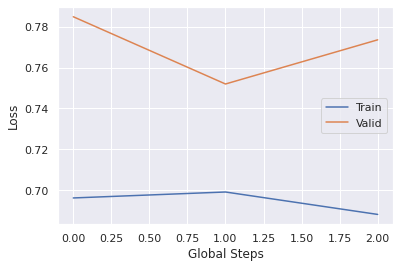

100%|██████████| 52/52 [01:05<00:00,  1.26s/it]


Valid_loss decreased inf --> 0.7456228039585627
save model
Epoch : 1 Train Loss : 0.696241 Train Acc : 0.711429
Epoch : 1 Valid Loss : 0.745623 Valid Acc : 0.683077


100%|██████████| 52/52 [01:05<00:00,  1.26s/it]


Epoch : 2 Train Loss : 0.689636 Train Acc : 0.713668
Epoch : 2 Valid Loss : 0.772137 Valid Acc : 0.669872


100%|██████████| 52/52 [01:05<00:00,  1.26s/it]


Epoch : 3 Train Loss : 0.685170 Train Acc : 0.711819
Epoch : 3 Valid Loss : 0.778027 Valid Acc : 0.664872
Model saved to ==> image_model/models/tf_efficientnet_b3_ns_128_ground_truth/tf_efficientnet_b3_ns_128_ground_truth_metrics.pt


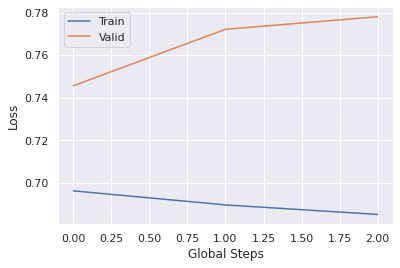

100%|██████████| 52/52 [01:06<00:00,  1.27s/it]


Valid_loss decreased inf --> 0.7685719980643346
save model
Epoch : 1 Train Loss : 0.706944 Train Acc : 0.704636
Epoch : 1 Valid Loss : 0.768572 Valid Acc : 0.665128


100%|██████████| 52/52 [01:05<00:00,  1.26s/it]


Valid_loss decreased 0.7685719980643346 --> 0.7572994106090986
save model
Epoch : 2 Train Loss : 0.690528 Train Acc : 0.706643
Epoch : 2 Valid Loss : 0.757299 Valid Acc : 0.678462


100%|██████████| 52/52 [01:05<00:00,  1.25s/it]


Valid_loss decreased 0.7572994106090986 --> 0.7453371504178414
save model
Epoch : 3 Train Loss : 0.682444 Train Acc : 0.711935
Epoch : 3 Valid Loss : 0.745337 Valid Acc : 0.680898
Model saved to ==> image_model/models/tf_efficientnet_b3_ns_256_ground_truth/tf_efficientnet_b3_ns_256_ground_truth_metrics.pt


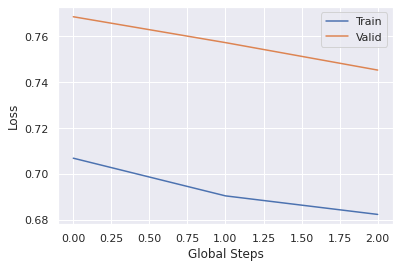

In [116]:
import torch
from torch import nn

LR = 0.0001
EPOCHS = 3

criterion = nn.CrossEntropyLoss().to(DEVICE)


for model_ in models.keys():
    optimizer = torch.optim.Adam(models[model_]['model'].parameters(),lr = LR)
    trainer = train_model.ImageTrainer(DEVICE, model_,use_ground_for_training=True, use_ground_for_validate=True, criterion=criterion,optimizer=optimizer)
    trainer.fit(models[model_]['model'],models[model_]['dataloaders'][0],models[model_]['dataloaders'][1],EPOCHS, DESTINATION_FOLDER)

## Step 6: Evaluation for ground_truth models

In [117]:
import image_model.evaluation as evaluation
reload(evaluation)

<module 'image_model.evaluation' from '/content/image_model/evaluation.py'>

100%|██████████| 29/29 [00:31<00:00,  1.07s/it]


Classification Report for model tf_efficientnet_b0_ns_128_ground_truth:
              precision    recall  f1-score   support

 Bad quality     0.7455    0.6674    0.7043       439
  OK quality     0.6402    0.5661    0.6009       484
Good quality     0.6759    0.8114    0.7375       509

    accuracy                         0.6844      1432
   macro avg     0.6872    0.6816    0.6809      1432
weighted avg     0.6852    0.6844    0.6812      1432



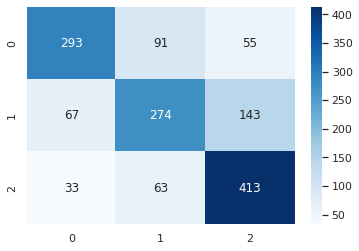

100%|██████████| 29/29 [00:31<00:00,  1.08s/it]


Classification Report for model tf_efficientnet_b0_ns_256_ground_truth:
              precision    recall  f1-score   support

 Bad quality     0.7273    0.6743    0.6998       439
  OK quality     0.6280    0.6033    0.6154       484
Good quality     0.6857    0.7544    0.7184       509

    accuracy                         0.6788      1432
   macro avg     0.6803    0.6773    0.6779      1432
weighted avg     0.6789    0.6788    0.6779      1432



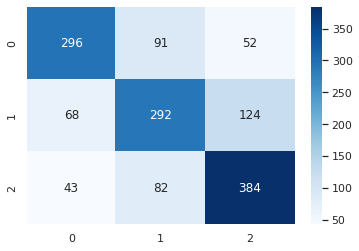

100%|██████████| 29/29 [00:32<00:00,  1.12s/it]


Classification Report for model tf_efficientnet_b1_ns_128_ground_truth:
              precision    recall  f1-score   support

 Bad quality     0.7702    0.6720    0.7178       439
  OK quality     0.6860    0.5145    0.5880       484
Good quality     0.6297    0.8487    0.7230       509

    accuracy                         0.6816      1432
   macro avg     0.6953    0.6784    0.6762      1432
weighted avg     0.6918    0.6816    0.6758      1432



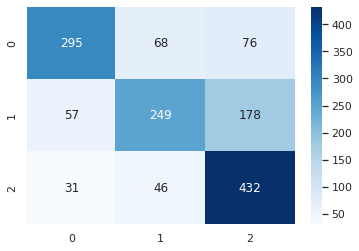

100%|██████████| 29/29 [00:32<00:00,  1.11s/it]


Classification Report for model tf_efficientnet_b1_ns_256_ground_truth:
              precision    recall  f1-score   support

 Bad quality     0.7525    0.6788    0.7138       439
  OK quality     0.6756    0.5207    0.5881       484
Good quality     0.6395    0.8330    0.7235       509

    accuracy                         0.6802      1432
   macro avg     0.6892    0.6775    0.6751      1432
weighted avg     0.6864    0.6802    0.6748      1432



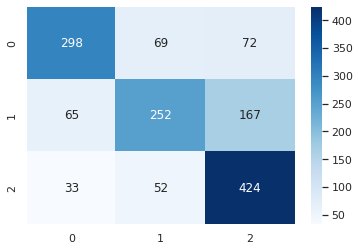

100%|██████████| 29/29 [00:33<00:00,  1.16s/it]


Classification Report for model tf_efficientnet_b2_ns_128_ground_truth:
              precision    recall  f1-score   support

 Bad quality     0.7606    0.6150    0.6801       439
  OK quality     0.6555    0.5661    0.6075       484
Good quality     0.6297    0.8153    0.7106       509

    accuracy                         0.6697      1432
   macro avg     0.6819    0.6655    0.6661      1432
weighted avg     0.6786    0.6697    0.6664      1432



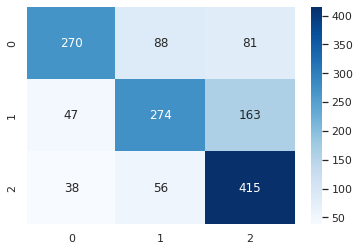

100%|██████████| 29/29 [00:33<00:00,  1.16s/it]


Classification Report for model tf_efficientnet_b2_ns_256_ground_truth:
              precision    recall  f1-score   support

 Bad quality     0.7597    0.6264    0.6866       439
  OK quality     0.6439    0.5640    0.6013       484
Good quality     0.6424    0.8153    0.7186       509

    accuracy                         0.6725      1432
   macro avg     0.6820    0.6686    0.6689      1432
weighted avg     0.6789    0.6725    0.6692      1432



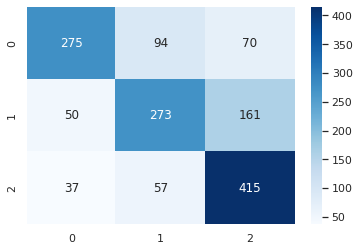

100%|██████████| 29/29 [00:36<00:00,  1.26s/it]


Classification Report for model tf_efficientnet_b3_ns_128_ground_truth:
              precision    recall  f1-score   support

 Bad quality     0.7572    0.6606    0.7056       439
  OK quality     0.6514    0.5599    0.6022       484
Good quality     0.6682    0.8310    0.7408       509

    accuracy                         0.6872      1432
   macro avg     0.6923    0.6839    0.6829      1432
weighted avg     0.6898    0.6872    0.6832      1432



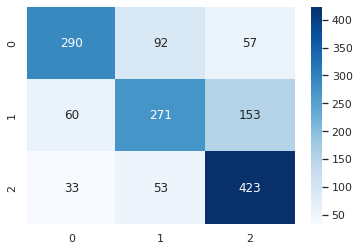

100%|██████████| 29/29 [00:36<00:00,  1.24s/it]


Classification Report for model tf_efficientnet_b3_ns_256_ground_truth:
              precision    recall  f1-score   support

 Bad quality     0.7196    0.6606    0.6888       439
  OK quality     0.6224    0.5620    0.5907       484
Good quality     0.6622    0.7701    0.7121       509

    accuracy                         0.6662      1432
   macro avg     0.6681    0.6642    0.6639      1432
weighted avg     0.6663    0.6662    0.6639      1432



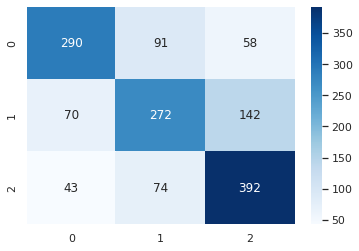

In [118]:
for model_ in models.keys():
    evaluation.load_checkpoint('image_model/models/' + model_ + '/' + model_ + '.pt', models[model_]['model'])
    models[model_]['accuracy'] = evaluation.evaluate(models[model_]['model'], model_, models[model_]['dataloaders'][2], DEVICE)

In [119]:
import pandas as pd
df = []
for model_ in models:
    df.append({
        'label': model_,
        'accuracy': models[model_]['accuracy']
    })
pd.DataFrame(df)

,label,accuracy
0,tf_efficientnet_b0_ns_128_ground_truth,0.684358
1,tf_efficientnet_b0_ns_256_ground_truth,0.678771
2,tf_efficientnet_b1_ns_128_ground_truth,0.681564
3,tf_efficientnet_b1_ns_256_ground_truth,0.680168
4,tf_efficientnet_b2_ns_128_ground_truth,0.669693
5,tf_efficientnet_b2_ns_256_ground_truth,0.672486
6,tf_efficientnet_b3_ns_128_ground_truth,0.687151
7,tf_efficientnet_b3_ns_256_ground_truth,0.666201


## Step 7 create model for noisy dataset

In [28]:
reload(model)
reload(init_dataset_dataloader)

<module 'image_model.init_dataset_dataloader' from '/content/image_model/init_dataset_dataloader.py'>

In [49]:
models = {}
efficientNet = 'tf_efficientnet_b3_ns'
last_layer = 128
dataset_label = efficientNet + '_' + str(last_layer) + '_ground_truth'
noisy_model = dataset_label
models[dataset_label] = {}
models[dataset_label]['model'] = model.create_model(efficientNet, last_layer).to(DEVICE)
models[dataset_label]['datasets'] =  init_dataset_dataloader.create_datasets('image_model/', efficientnet_input_sizes[efficientNet])
models[dataset_label]['dataloaders']  = init_dataset_dataloader.create_dataloaders(models[dataset_label]['datasets'][0], 
                                                                                                                models[dataset_label]['datasets'][1], 
                                                                                                                models[dataset_label]['datasets'][2], 
                                                                                                                BATCH_SIZE, NUM_OF_WORKERS)
print(models.keys())

dict_keys(['tf_efficientnet_b3_ns_128_ground_truth'])


## Step 8: Training noisy model

In [50]:
import image_model.train_model as train_model

100%|██████████| 256/256 [01:11<00:00,  3.57it/s]


Valid_loss decreased inf --> 0.8077748620416969
save model
Epoch : 1 Train Loss : 0.877258 Train Acc : 0.620390
Epoch : 1 Valid Loss : 0.807775 Valid Acc : 0.627735


100%|██████████| 256/256 [01:12<00:00,  3.55it/s]


Valid_loss decreased 0.8077748620416969 --> 0.7897104715229943
save model
Epoch : 2 Train Loss : 0.748213 Train Acc : 0.680878
Epoch : 2 Valid Loss : 0.789710 Valid Acc : 0.638281


100%|██████████| 256/256 [01:11<00:00,  3.57it/s]


Valid_loss decreased 0.7897104715229943 --> 0.7582028977340087
save model
Epoch : 3 Train Loss : 0.721035 Train Acc : 0.693074
Epoch : 3 Valid Loss : 0.758203 Valid Acc : 0.658333


100%|██████████| 256/256 [01:12<00:00,  3.55it/s]


Valid_loss decreased 0.7582028977340087 --> 0.7572652563103475
save model
Epoch : 4 Train Loss : 0.692278 Train Acc : 0.703707
Epoch : 4 Valid Loss : 0.757265 Valid Acc : 0.665234


100%|██████████| 256/256 [01:11<00:00,  3.59it/s]


Valid_loss decreased 0.7572652563103475 --> 0.7336615802487358
save model
Epoch : 5 Train Loss : 0.686968 Train Acc : 0.706732
Epoch : 5 Valid Loss : 0.733662 Valid Acc : 0.675781


100%|██████████| 256/256 [01:11<00:00,  3.58it/s]


Epoch : 6 Train Loss : 0.679210 Train Acc : 0.711805
Epoch : 6 Valid Loss : 0.748019 Valid Acc : 0.669401


100%|██████████| 256/256 [01:11<00:00,  3.59it/s]


Epoch : 7 Train Loss : 0.676339 Train Acc : 0.709268
Epoch : 7 Valid Loss : 0.757847 Valid Acc : 0.668230


100%|██████████| 256/256 [01:11<00:00,  3.59it/s]


Epoch : 8 Train Loss : 0.668112 Train Acc : 0.713854
Epoch : 8 Valid Loss : 0.762716 Valid Acc : 0.661068


100%|██████████| 256/256 [01:11<00:00,  3.58it/s]


Epoch : 9 Train Loss : 0.653886 Train Acc : 0.724683
Epoch : 9 Valid Loss : 0.736822 Valid Acc : 0.679036


100%|██████████| 256/256 [01:11<00:00,  3.58it/s]


Epoch : 10 Train Loss : 0.653481 Train Acc : 0.722049
Epoch : 10 Valid Loss : 0.771624 Valid Acc : 0.670703
Model saved to ==> image_model/models/tf_efficientnet_b3_ns_128_ground_truth/tf_efficientnet_b3_ns_128_ground_truth_metrics.pt


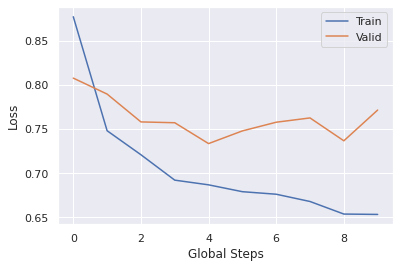

In [51]:
import torch
from torch import nn

EPOCHS = 10
LR = 0.0001

for model_ in models.keys():
    criterion = nn.CrossEntropyLoss().to(DEVICE)
    optimizer = torch.optim.Adam(models[noisy_model]['model'].parameters(),lr = LR)
    trainer = train_model.ImageTrainer(DEVICE, model_,use_ground_for_training=False, use_ground_for_validate=False, criterion=criterion,optimizer=optimizer)
    trainer.fit(models[noisy_model]['model'],models[noisy_model]['dataloaders'][0],models[noisy_model]['dataloaders'][1],EPOCHS, DESTINATION_FOLDER)

## Step 9: Evaluation for noisy model

In [52]:
import image_model.evaluation as evaluation
reload(evaluation)

<module 'image_model.evaluation' from '/content/image_model/evaluation.py'>

100%|██████████| 144/144 [00:39<00:00,  3.60it/s]


Classification Report for model tf_efficientnet_b3_ns_128_ground_truth:
              precision    recall  f1-score   support

 Bad quality     0.6126    0.6629    0.6368       439
  OK quality     0.6168    0.5620    0.5881       484
Good quality     0.6957    0.7053    0.7005       509

    accuracy                         0.6439      1432
   macro avg     0.6417    0.6434    0.6418      1432
weighted avg     0.6436    0.6439    0.6430      1432



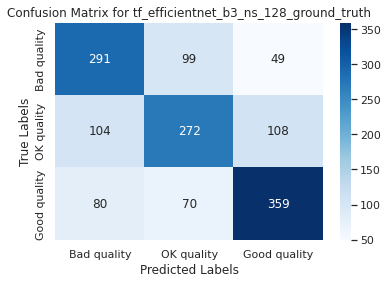

In [53]:
evaluation.load_checkpoint('image_model/models/' + noisy_model + '/' + noisy_model + '.pt', models[noisy_model]['model'])
models[noisy_model]['accuracy'] = evaluation.evaluate(models[noisy_model]['model'], noisy_model, models[noisy_model]['dataloaders'][2], DEVICE)

In [ ]:
if os.path.isdir('models'):
    shutil.rmtree('models')
if os.path.isdir('lookup_tables'):
    shutil.rmtree('lookup_tables')
if os.path.isdir('image_dataset'):
    shutil.rmtree('image_dataset')